Load Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from fancyimpute import KNN
import seaborn as sns
import statistics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
## Linear Regression 
import statsmodels.api as sm
##Decision trees
from sklearn.tree import DecisionTreeRegressor
##Random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math

Using TensorFlow backend.
C:\Users\Garima\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Set working directory

In [2]:
#Set working directory
os.chdir("C:/Users/Garima/Downloads/Edwisor")

Fetch data

In [3]:
## Load Data
absenteeism_data = pd.read_excel("Absenteeism_at_work_Project.xls")

In [4]:
## Check data in the dataset abesnteeism_data
absenteeism_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [5]:
##Check summary of the data 
absenteeism_data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,737.000000,739.000000,740.000000,740.000000,733.000000,737.000000,737.000000,737.000000,730.000000,...,734.000000,730.000000,734.000000,737.000000,736.000000,738.000000,739.000000,726.000000,709.000000,718.000000
mean,18.017568,19.188602,6.319350,3.914865,2.544595,221.035471,29.667571,12.565807,36.449118,271188.860274,...,0.053134,1.295890,1.017711,0.567164,0.073370,0.746612,79.063599,172.152893,26.684062,6.977716
std,11.021247,8.437493,3.435948,1.421675,1.111831,66.954179,14.848124,4.389813,6.480148,38981.880873,...,0.224453,0.676965,1.094928,0.495805,0.260919,1.319726,12.868630,6.081065,4.292819,13.476962
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [6]:
##Check datatypes of columns
absenteeism_data.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [7]:
## Separate features into categorical and numerical data set

categorical_set = ["Reason for absence","Month of absence","Day of the week","Seasons","Disciplinary failure","Education","Social drinker","Social smoker"]
numerical_set = ["ID","Transportation expense","Distance from Residence to Work","Service time","Age","Work load Average/day ","Hit target","Son","Pet","Weight","Height","Body mass index","Absenteeism time in hours"]
## Converting categorical_set data into category types from int/float
for i in categorical_set :
    absenteeism_data[i] = absenteeism_data[i].astype("category")

In [8]:
## In our data set if the below features has 0 as the value ,since it is  practically not  an acceptable value, we will replace it with NA
for i in ["Reason for absence","Month of absence","Day of the week","Seasons","Education","ID","Age","Weight","Height","Body mass index"]:
        absenteeism_data[i] = absenteeism_data[i].replace(0,np.nan)

# Missing Value Analysis

In [9]:
## Missing value analysis 
NA_data = pd.DataFrame(absenteeism_data.isnull().sum())
NA_data = NA_data.rename(columns={0:"NA_sum"})
NA_data["NA_percent"] = (NA_data["NA_sum"]/len(absenteeism_data))*100
NA_data

,NA_sum,NA_percent
ID,0,0.000000
Reason for absence,46,6.216216
Month of absence,4,0.540541
Day of the week,0,0.000000
Seasons,0,0.000000
Transportation expense,7,0.945946
Distance from Residence to Work,3,0.405405
Service time,3,0.405405
Age,3,0.405405
Work load Average/day,10,1.351351


In [10]:
##If any feature has more than 30% of missing data then drop that column else perform missing value analysis   
for i in range(0,len(NA_data)):
    if(NA_data["NA_percent"][i]>=30):
        absenteeism_data.drop([i],axis = 1)
        ## update numerical and categorical set as well
        if(i in numerical_set):
            numerical_set.remove(i)
        else :
            categorical_set.remove(i)

In [11]:
#### Missing value analysis
## Mean mode method method 
## Mean for numerical features
##Mode for categorical features
def impute_mean_mode(data_set):
    for i in data_set.columns.values:
        if data_set.loc[:,i].dtypes.name == 'int64'or data_set.loc[:,i].dtypes.name == 'float64':
            data_set[i] = round(data_set[i].fillna(data_set[i].mean()))

        ## mode method for categorical features
        elif data_set.loc[:,i].dtypes.name == 'category':
            data_set[i] = data_set[i].fillna(statistics.mode(data_set[i]))
            
    return data_set            
               
            
  

In [12]:
## median method for numerical features
##Mode for categorical features
def impute_median_mode(data_set):
    for i in data_set.columns.values:
        if data_set.loc[:,i].dtypes.name == 'int64'or data_set.loc[:,i].dtypes.name == 'float64':
            data_set[i] = data_set[i].fillna(data_set[i].median())

        ## mode method for categorical features
        elif data_set.loc[:,i].dtypes.name == 'category':
            data_set[i] = data_set[i].fillna(statistics.mode(data_set[i]))
            
            
    return data_set
  

In [13]:
## using knn imputation method for imputation
def impute_knn(data_set):
    print("Missing values in the data set")
    data_set = pd.DataFrame(KNN(k=3).complete(data_set),columns = data_set.columns)
    return data_set

In [14]:
absenteeism_data.isnull().sum().sum()

181

In [15]:
#Out of the three methods ,we chose median mode method for imputation as it gave the closest results for numerical as well as categorical data
if(absenteeism_data.isnull().sum().sum()!=0):
    #absenteeism_data = impute_mean_mode(absenteeism_data)
    absenteeism_data = impute_median_mode(absenteeism_data)
    #absenteeism_data = impute_knn(absenteeism_data)
    


In [16]:
absenteeism_data.isnull().sum().sum()

0

# Data Visualisation

Numerical feature set

Text(0.5,1,'Histogram of ID')

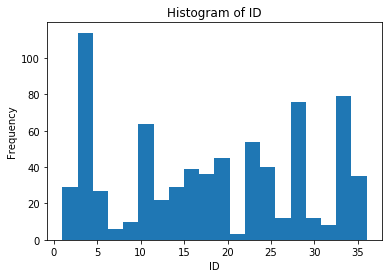

In [17]:
%matplotlib inline
plot.hist(absenteeism_data['ID'],bins = 20)
plot.xlabel("ID")
plot.ylabel("Frequency")
plot.title("Histogram of ID")

Text(0.5,1,'Histogram of Transportation expense')

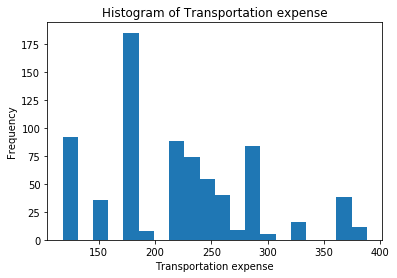

In [18]:
plot.hist(absenteeism_data['Transportation expense'],bins = 20)
plot.xlabel("Transportation expense")
plot.ylabel("Frequency")
plot.title("Histogram of Transportation expense")

Text(0.5,1,'Histogram of Distance from Residence to Work')

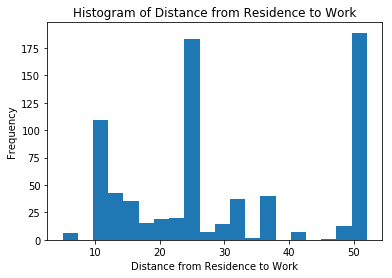

In [19]:
plot.hist(absenteeism_data['Distance from Residence to Work'],bins = 20)
plot.xlabel("Distance from Residence to Work")
plot.ylabel("Frequency")
plot.title("Histogram of Distance from Residence to Work")

Text(0.5,1,'Histogram of Service time')

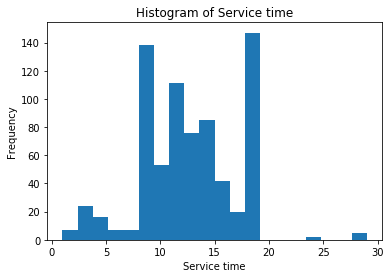

In [20]:
plot.hist(absenteeism_data['Service time'],bins = 20)
plot.xlabel("Service time")
plot.ylabel("Frequency")
plot.title("Histogram of Service time")

Text(0.5,1,'Histogram of Age')

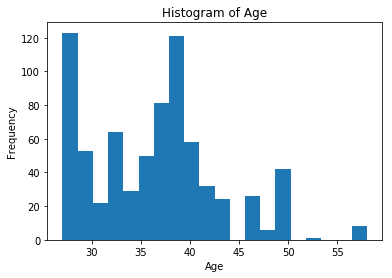

In [21]:
plot.hist(absenteeism_data['Age'],bins = 20)
plot.xlabel("Age")
plot.ylabel("Frequency")
plot.title("Histogram of Age")

Text(0.5,1,'Histogram of Work load Average/day')

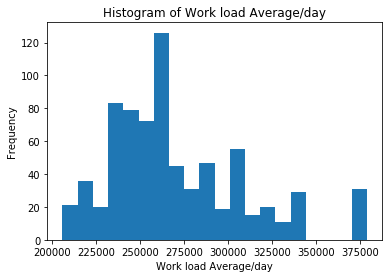

In [22]:
plot.hist(absenteeism_data['Work load Average/day '],bins = 20)
plot.xlabel("Work load Average/day")
plot.ylabel("Frequency")
plot.title("Histogram of Work load Average/day")

Text(0.5,1,'Histogram of Hit target')

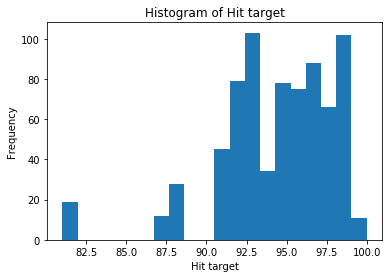

In [23]:
plot.hist(absenteeism_data['Hit target'],bins = 20)
plot.xlabel("Hit target")
plot.ylabel("Frequency")
plot.title("Histogram of Hit target")

Text(0.5,1,'Histogram of Son')

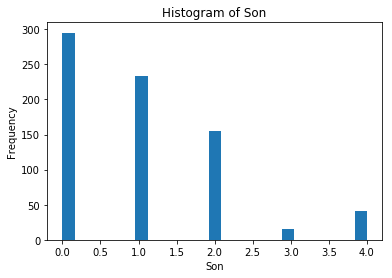

In [24]:
plot.hist(absenteeism_data['Son'],bins = 25)
plot.xlabel("Son")
plot.ylabel("Frequency")
plot.title("Histogram of Son")


Text(0.5,1,'Histogram of Pet')

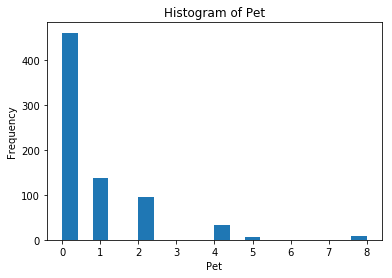

In [25]:
plot.hist(absenteeism_data['Pet'],bins = 20)
plot.xlabel("Pet")
plot.ylabel("Frequency")
plot.title("Histogram of Pet")

Text(0.5,1,'Histogram of Height')

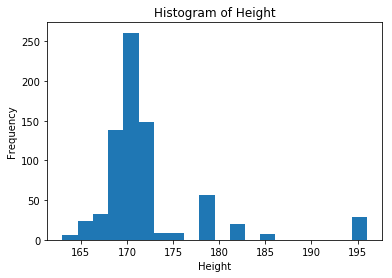

In [26]:
plot.hist(absenteeism_data['Height'],bins = 20)
plot.xlabel("Height")
plot.ylabel("Frequency")
plot.title("Histogram of Height")

Text(0.5,1,'Histogram of Weight')

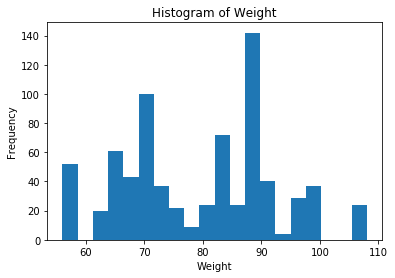

In [27]:
plot.hist(absenteeism_data['Weight'],bins = 20)
plot.xlabel("Weight")
plot.ylabel("Frequency")
plot.title("Histogram of Weight")

Text(0.5,1,'Histogram of Body mass index')

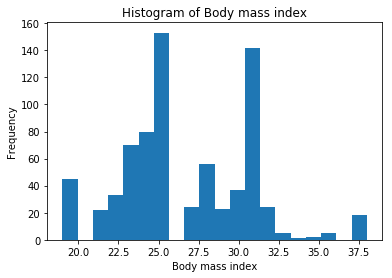

In [28]:
plot.hist(absenteeism_data['Body mass index'],bins = 20)
plot.xlabel("Body mass index")
plot.ylabel("Frequency")
plot.title("Histogram of Body mass index")

Text(0.5,1,'Histogram of Absenteeism time in hours')

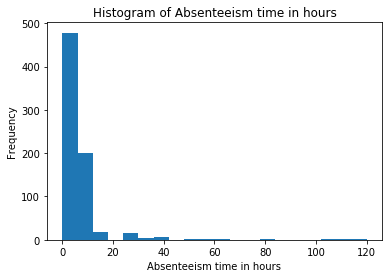

In [29]:
plot.hist(absenteeism_data['Absenteeism time in hours'],bins = 20)
plot.xlabel("Absenteeism time in hours")
plot.ylabel("Frequency")
plot.title("Histogram of Absenteeism time in hours")

Categorical feature set

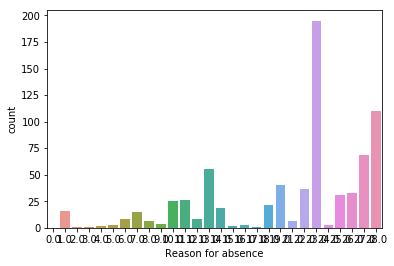

In [30]:
sns.countplot(absenteeism_data["Reason for absence"])

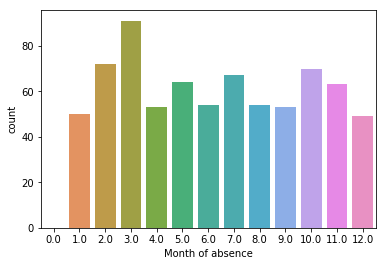

In [31]:
sns.countplot(absenteeism_data["Month of absence"])

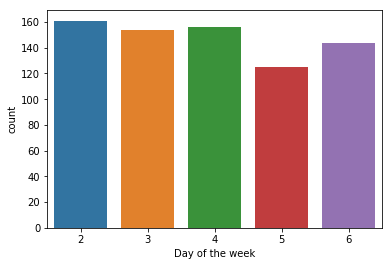

In [32]:
sns.countplot(absenteeism_data["Day of the week"])

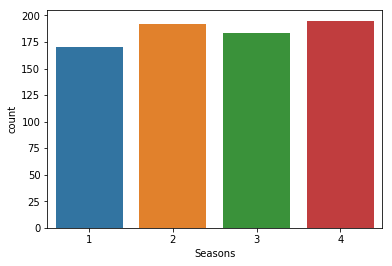

In [33]:
sns.countplot(absenteeism_data["Seasons"])

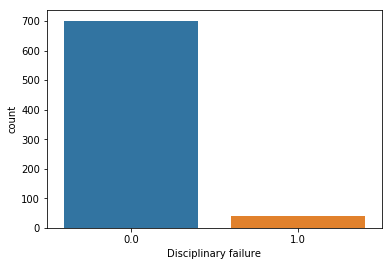

In [34]:
sns.countplot(absenteeism_data["Disciplinary failure"])

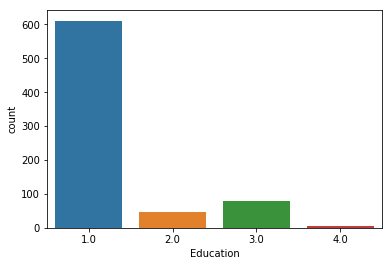

In [35]:
sns.countplot(absenteeism_data["Education"])

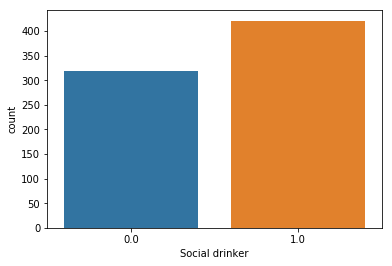

In [36]:
sns.countplot(absenteeism_data["Social drinker"])

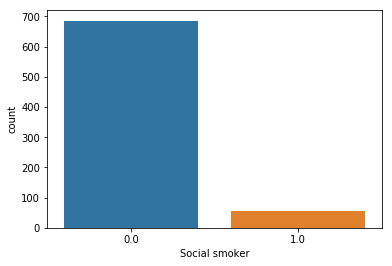

In [37]:
sns.countplot(absenteeism_data["Social smoker"])

Categorical feature set vs Target variable

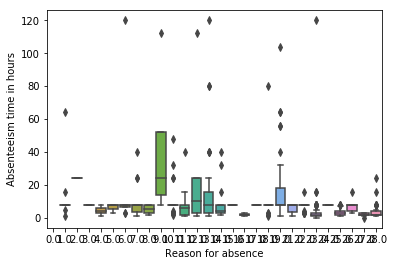

In [38]:
sns.boxplot(absenteeism_data['Reason for absence'],absenteeism_data['Absenteeism time in hours'])

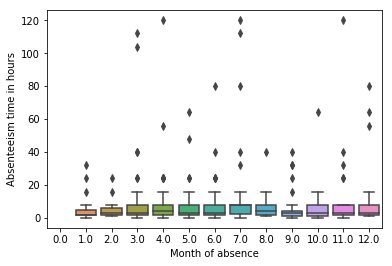

In [39]:
%matplotlib inline
sns.boxplot(absenteeism_data['Month of absence'],absenteeism_data['Absenteeism time in hours'])

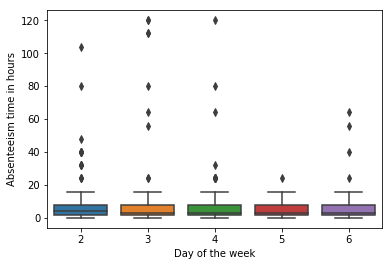

In [40]:
sns.boxplot(absenteeism_data['Day of the week'],absenteeism_data['Absenteeism time in hours'])

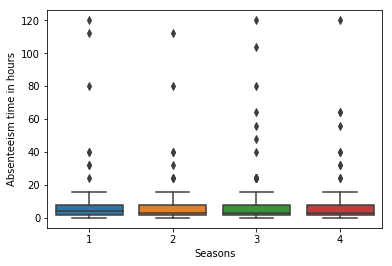

In [41]:
sns.boxplot(absenteeism_data['Seasons'],absenteeism_data['Absenteeism time in hours'])

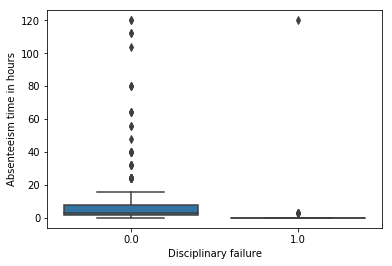

In [42]:
%matplotlib inline
sns.boxplot(absenteeism_data['Disciplinary failure'],absenteeism_data['Absenteeism time in hours'])

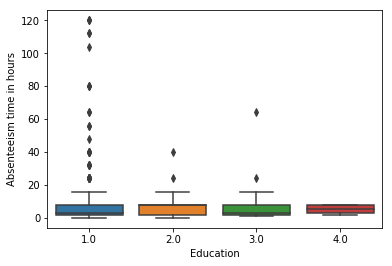

In [43]:
sns.boxplot(absenteeism_data['Education'],absenteeism_data['Absenteeism time in hours'])

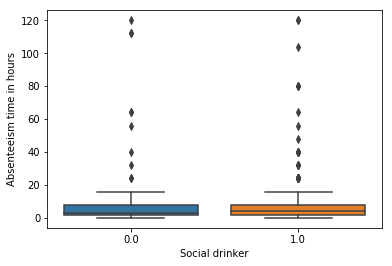

In [44]:
sns.boxplot(absenteeism_data['Social drinker'],absenteeism_data['Absenteeism time in hours'])

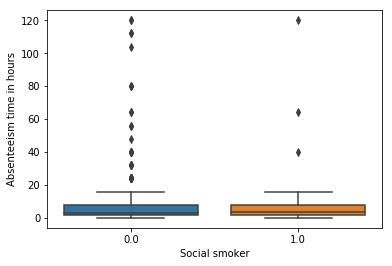

In [45]:
sns.boxplot(absenteeism_data['Social smoker'],absenteeism_data['Absenteeism time in hours'])

# Outlier Analysis

In [46]:
##Outlier analysis
## Replace outliers with NaN
for i in numerical_set:
    print(i)
    q75,q25 = np.percentile(absenteeism_data[i],[75,25])
    iqr = q75-q25
    min_bar = (q25-(1.5*iqr))
    max_bar = (q75+(1.5*iqr))
    print(min_bar,max_bar)
    absenteeism_data.loc[absenteeism_data[i]<min_bar,i] = np.nan
    absenteeism_data.loc[absenteeism_data[i]>max_bar,i] = np.nan    

ID
-19.5 56.5
Transportation expense
57.5 381.5
Distance from Residence to Work
-35.0 101.0
Service time
-1.5 26.5
Age
17.5 53.5
Work load Average/day 
183688.0 345552.0
Hit target
87.0 103.0
Son
-3.0 5.0
Pet
-1.5 2.5
Weight
39.0 119.0
Height
164.5 176.5
Body mass index
13.5 41.5
Absenteeism time in hours
-7.0 17.0


In [47]:
#impute NaN with median mode 
## median mode method for imputation
absenteeism_data = impute_median_mode(absenteeism_data)
#absenteeism_data

# Feature Selection

Correlation Analysis

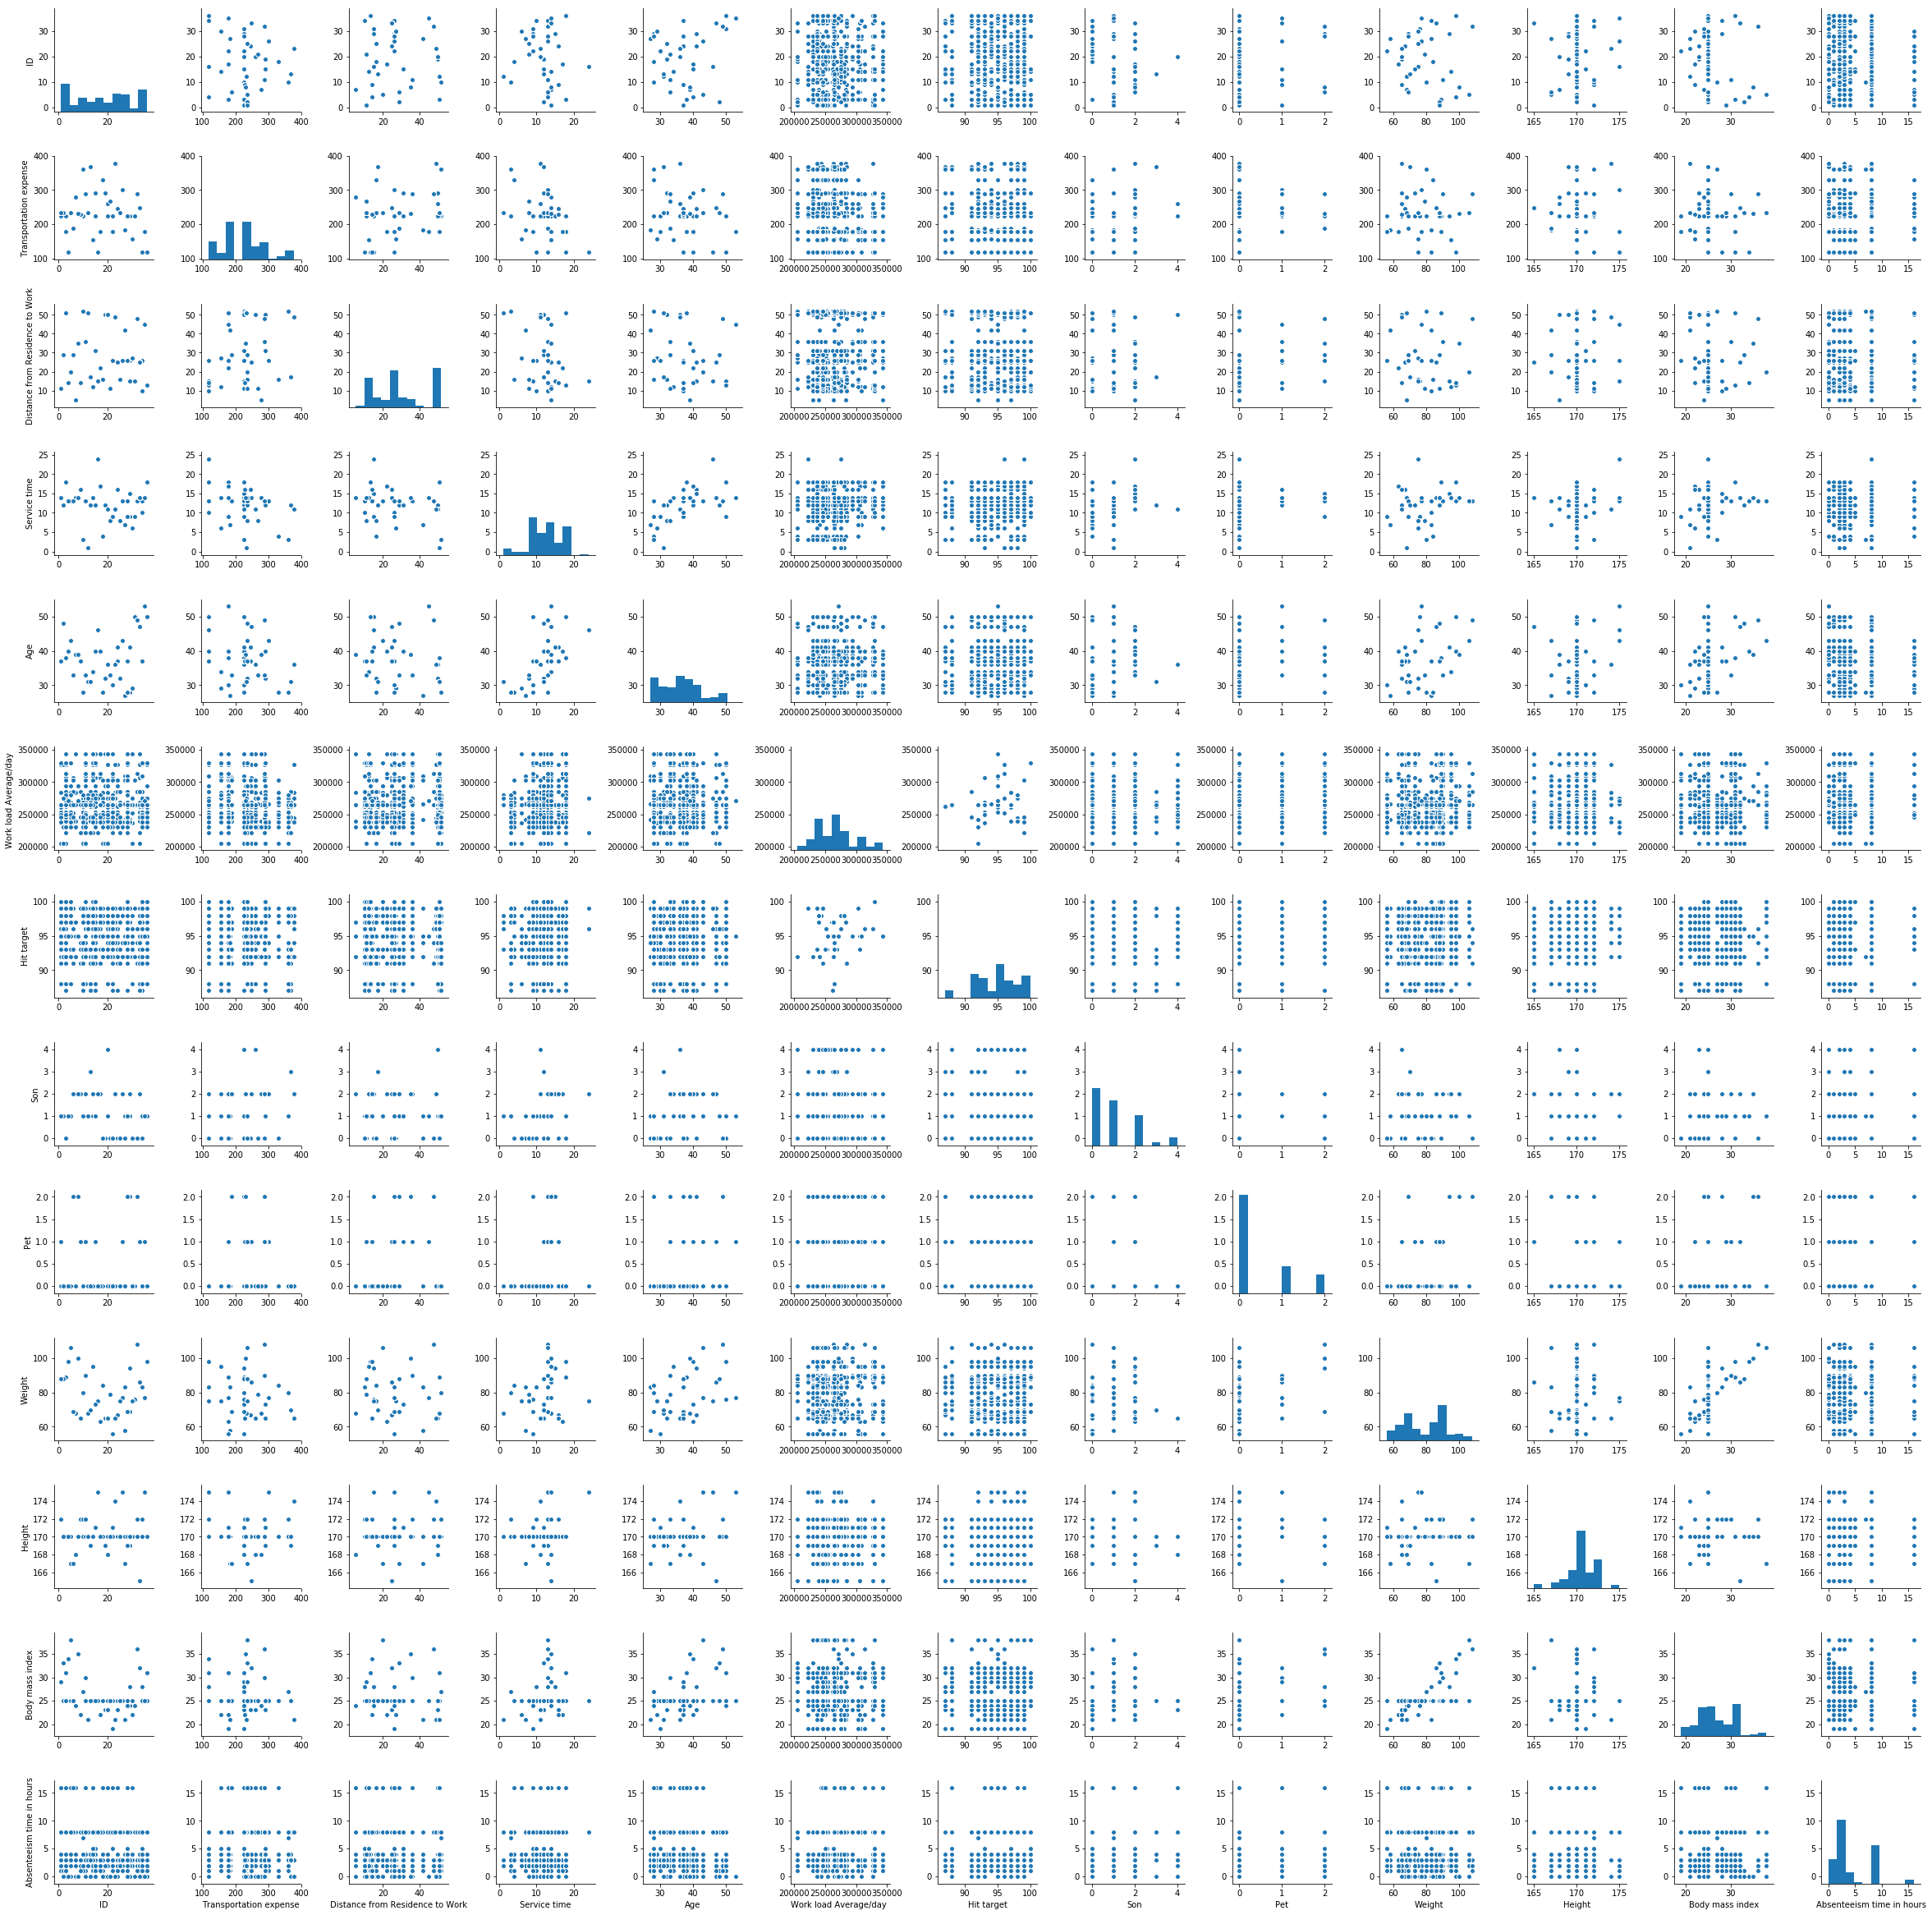

In [48]:
%matplotlib inline
sns.pairplot(absenteeism_data[numerical_set[0:13]])

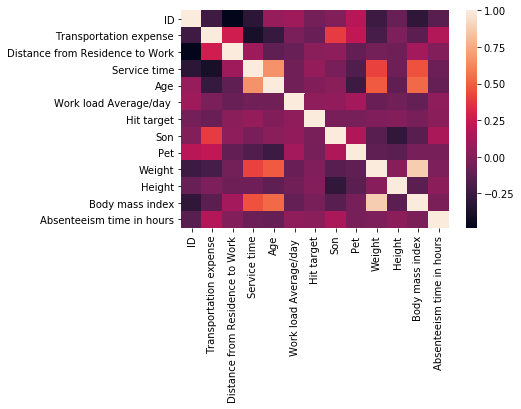

In [49]:
## Correlation analysis
%matplotlib inline
sns.heatmap(absenteeism_data[numerical_set].corr())

In [50]:
absenteeism_data[numerical_set].corr()
## We see that weight and BMI are highly correlated arounf 0.88 .Hence ,we will remove one of them ,say Weight

,ID,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Son,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,1.000000,-0.238487,-0.484599,-0.315995,0.075245,0.105892,-0.040791,0.007180,0.191770,-0.252522,-0.086747,-0.298518,-0.137248
Transportation expense,-0.238487,1.000000,0.269880,-0.388794,-0.272455,-0.026206,-0.084117,0.392883,0.220950,-0.209688,-0.010510,-0.127190,0.169461
Distance from Residence to Work,-0.484599,0.269880,1.000000,0.102839,-0.116288,-0.088577,0.028393,0.047436,-0.106651,-0.045356,-0.069295,0.117482,0.003093
Service time,-0.315995,-0.388794,0.102839,1.000000,0.664295,-0.055887,0.070576,-0.028885,-0.171583,0.418385,-0.065191,0.462285,-0.075359
Age,0.075245,-0.272455,-0.116288,0.664295,1.000000,-0.060291,-0.000852,0.028266,-0.244449,0.485327,-0.119074,0.530350,-0.091290
Work load Average/day,0.105892,-0.026206,-0.088577,-0.055887,-0.060291,1.000000,0.051187,0.058771,0.114110,-0.080657,-0.057388,-0.097905,0.051813
Hit target,-0.040791,-0.084117,0.028393,0.070576,-0.000852,0.051187,1.000000,-0.031719,-0.034439,-0.004581,0.009917,-0.029146,0.030328
Son,0.007180,0.392883,0.047436,-0.028885,0.028266,0.058771,-0.031719,1.000000,0.155477,-0.142021,-0.291705,-0.141000,0.137991
Pet,0.191770,0.220950,-0.106651,-0.171583,-0.244449,0.114110,-0.034439,0.155477,1.000000,-0.113578,-0.132201,-0.036896,-0.037769
Weight,-0.252522,-0.209688,-0.045356,0.418385,0.485327,-0.080657,-0.004581,-0.142021,-0.113578,1.000000,0.023486,0.881802,-0.011611


VIF(Variance Inflation Factor)

In [51]:
X = absenteeism_data[numerical_set].assign(const = 1)
pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
#only Weight and Body mass index has VIF >5 .Thus we will remove one of them

ID                                     2.555528
Transportation expense                 2.199472
Distance from Residence to Work        1.593952
Service time                           3.443374
Age                                    3.501619
Work load Average/day                  1.042375
Hit target                             1.024523
Son                                    1.532156
Pet                                    1.458590
Weight                                 6.039502
Height                                 1.328574
Body mass index                        7.227522
Absenteeism time in hours              1.082891
const                              14722.123211
dtype: float64

In [52]:
## Performing one way anova on categorical dataset

for i in categorical_set:
    print(i) 
    print(stats.f_oneway(absenteeism_data[i],absenteeism_data['Absenteeism time in hours']))


Reason for absence
F_onewayResult(statistic=3326.088836175677, pvalue=0.0)
Month of absence
F_onewayResult(statistic=149.39159879511399, pvalue=8.5020444315905933e-33)
Day of the week
F_onewayResult(statistic=4.3446331019810183, pvalue=0.037297113544069713)
Seasons
F_onewayResult(statistic=164.87591132419661, pvalue=7.4327422329725796e-36)
Disciplinary failure
F_onewayResult(statistic=1154.6532791575944, pvalue=1.6372426248884337e-187)
Education
F_onewayResult(statistic=546.53989162615915, pvalue=4.1194026059897665e-103)
Social drinker
F_onewayResult(statistic=869.03625240230349, pvalue=1.2809993353034328e-150)
Social smoker
F_onewayResult(statistic=1141.5220610928714, pvalue=6.6118550765910436e-186)


Dimension reduction

In [53]:
## Dimension reduction
absenteeism_data = absenteeism_data.drop(["Weight","Day of the week","Seasons","Education","Social smoker","Social drinker"],axis = 1)
absenteeism_data.head()

,ID,Reason for absence,Month of absence,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Pet,Height,Body mass index,Absenteeism time in hours
0,11.0,26.0,7.0,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,2.0,1.0,172.0,30.0,4.0
1,36.0,23.0,7.0,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,0.0,170.0,31.0,0.0
2,3.0,23.0,7.0,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,0.0,0.0,170.0,31.0,2.0
3,7.0,7.0,7.0,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,2.0,0.0,168.0,24.0,4.0
4,11.0,23.0,7.0,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,2.0,1.0,172.0,30.0,2.0


# Sampling

In [54]:
##Sampling
## We will do stratified sampling because we want at least some sample of each type of reasons of absence is to be in our train data
from sklearn.model_selection import train_test_split

In [55]:
absenteeism_data.dtypes
for i in absenteeism_data.columns.values:
    absenteeism_data[i] = absenteeism_data[i].astype('float')
    
absenteeism_data.dtypes
#absenteeism_data

ID                                 float64
Reason for absence                 float64
Month of absence                   float64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Son                                float64
Pet                                float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [56]:
##We take 25% of the data as test set and 75% as train set
absenteeism_data_test , absenteeism_data_train = train_test_split(absenteeism_data,test_size = 0.25)

# Model Development

Linear Regression

In [57]:
import statsmodels.api as sm
modelLR = sm.OLS(absenteeism_data_train.iloc[:,14],absenteeism_data_train.iloc[:,0:14],data = absenteeism_data).fit()
modelLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Absenteeism time in hours   R-squared:                       0.736
Model:                                   OLS   Adj. R-squared:                  0.714
Method:                        Least Squares   F-statistic:                     34.01
Date:                       Thu, 08 Nov 2018   Prob (F-statistic):           4.30e-42
Time:                               15:20:01   Log-Likelihood:                -440.95
No. Observations:                        185   AIC:                             909.9
Df Residuals:                            171   BIC:                             955.0
Df Model:                                 14                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
ID                                 -0.0234      0.028     -0.827      0.409      -0.079       0.032
Reason for absence                 -0.1036      0.034     -3.035      0.003      -0.171      -0.036
Month of absence                   -0.0677      0.069     -0.982      0.327      -0.204       0.068
Transportation expense              0.0097      0.005      1.965      0.051   -4.55e-05       0.019
Distance from Residence to Work    -0.0450      0.016     -2.905      0.004      -0.076      -0.014
Service time                        0.0716      0.086      0.832      0.406      -0.098       0.242
Age                                -0.0246      0.064     -0.385      0.701      -0.151       0.101
Work load Average/day           -1.012e-05   6.57e-06     -1.540      0.125   -2.31e-05    2.85e-06
Hit target                          0.0644      0.079      0.820      0.413      -0.091       0.219
Disciplinary failure               -4.1167      0.841     -4.897      0.000      -5.776      -2.457
Son                                 0.6938      0.221      3.135      0.002       0.257       1.131
Pet                                -0.4747      0.363     -1.308      0.193      -1.191       0.242
Height                             -0.0093      0.047     -0.197      0.844      -0.102       0.084
Body mass index                     0.1523      0.066      2.301      0.023       0.022       0.283
==============================================================================
Omnibus:                       44.772   Durbin-Watson:                   2.322
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.647
Skew:                           1.063   Prob(JB):                     1.89e-23
Kurtosis:                       6.009   Cond. No.                     1.12e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
## Predict 
predictLR = modelLR.predict(absenteeism_data_test.iloc[:,0:14])
#RMSE
math.sqrt(mean_squared_error(absenteeism_data_test.iloc[:,14],predictLR))

3.1617685569811256

Decision Tree

In [59]:
modelDT = DecisionTreeRegressor(max_depth=2).fit(absenteeism_data_train.iloc[:,0:14],absenteeism_data_train.iloc[:,14])

In [60]:
predictDT = modelDT.predict(absenteeism_data_test.iloc[:,0:14])

In [61]:
##RMSE
math.sqrt(mean_squared_error(absenteeism_data_test.iloc[:,14],predictDT))

3.0416284490706307

Random Forest

In [62]:
modelRF = RandomForestRegressor(max_depth=2,n_estimators=10,random_state=0,max_features=10).fit(absenteeism_data_train.iloc[:,0:14],absenteeism_data_train.iloc[:,14])

In [63]:
predictRF = modelRF.predict(absenteeism_data_test.iloc[:,0:14])

In [64]:
#RMSE
math.sqrt(mean_squared_error(absenteeism_data_test.iloc[:,14],predictRF))

2.9483172391336248

Model Inference 

In [65]:
reason_summary = absenteeism_data.loc[:,("Reason for absence","Absenteeism time in hours")]

In [66]:
reason_sum_hours = reason_summary.groupby("Reason for absence").sum()
reason_sum_hours

,Absenteeism time in hours
Reason for absence,
1.0,121.0
2.0,3.0
3.0,8.0
4.0,9.0
5.0,19.0
6.0,49.0
7.0,71.0
8.0,32.0
9.0,30.0


In [67]:
reason_mean_hours =  reason_summary.groupby("Reason for absence").mean()
reason_mean_hours

,Absenteeism time in hours
Reason for absence,
1.0,7.562500
2.0,3.000000
3.0,8.000000
4.0,4.500000
5.0,6.333333
6.0,6.125000
7.0,4.733333
8.0,5.333333
9.0,7.500000


In [68]:
reason_count_hours = reason_summary.groupby("Reason for absence").count()
reason_count_hours

,Absenteeism time in hours
Reason for absence,
1.0,16
2.0,1
3.0,1
4.0,2
5.0,3
6.0,8
7.0,15
8.0,6
9.0,4


# Monthly loss for the Company

In [69]:
#absenteeism_data.columns.values
loss_data = absenteeism_data[["Month of absence","Work load Average/day ","Service time","Absenteeism time in hours"]]

We define work loss = (Work load Average/day/Service time)*Absenteeism time in hours

In [84]:
loss_data["Work Loss"]=(absenteeism_data["Work load Average/day "]/absenteeism_data["Service time"])*absenteeism_data["Absenteeism time in hours"]
loss_data

C:\Users\Garima\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Month of absence,Work load Average/day,Service time,Absenteeism time in hours,Work Loss
0,7.0,239554.0,13.0,4.0,7.370892e+04
1,7.0,239554.0,18.0,0.0,0.000000e+00
2,7.0,239554.0,18.0,2.0,2.661711e+04
3,7.0,239554.0,14.0,4.0,6.844400e+04
4,7.0,239554.0,13.0,2.0,3.685446e+04
5,7.0,239554.0,18.0,3.0,3.992567e+04
6,7.0,239554.0,3.0,8.0,6.388107e+05
7,7.0,239554.0,11.0,4.0,8.711055e+04
8,7.0,239554.0,14.0,3.0,5.133300e+04
9,7.0,239554.0,14.0,8.0,1.368880e+05


In [71]:
monthly_loss = loss_data[["Month of absence","Work Loss"]]

In [72]:
monthly_loss = monthly_loss.groupby("Month of absence").sum()
monthly_loss

,Work Loss
Month of absence,
1.0,4.730330e+06
2.0,7.938029e+06
3.0,1.023768e+07
4.0,6.140413e+06
5.0,6.341453e+06
6.0,1.003318e+07
7.0,1.143110e+07
8.0,6.520187e+06
9.0,4.159296e+06


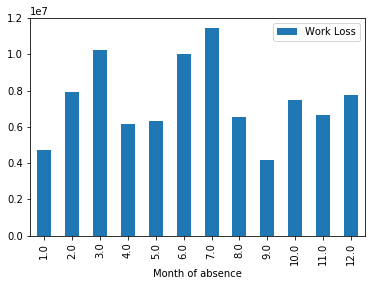

In [73]:
#sns.barplot(monthly_loss[["Month of absence"]])
monthly_loss.plot(kind='bar')